In [1]:
import numpy as np
import pickle as pkl
import os
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
dataset_f = os.path.join('numpy', 'dataset.pkl')
X_train, y_train, X_test, y_test = pkl.load(open(dataset_f, 'rb'))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [5]:
hist = model.fit(X_train, y_train, 
          validation_split=0.25,
          epochs=20,
          batch_size=16)

Train on 4752 samples, validate on 1584 samples
Epoch 1/20
4752/4752 [==============================] - 3s 583us/step - loss: 0.6941 - acc: 0.5236 - val_loss: 0.6876 - val_acc: 0.5455
Epoch 2/20
4752/4752 [==============================] - 1s 157us/step - loss: 0.6801 - acc: 0.5686 - val_loss: 0.6802 - val_acc: 0.5758
Epoch 3/20
4752/4752 [==============================] - 1s 170us/step - loss: 0.6709 - acc: 0.5892 - val_loss: 0.6719 - val_acc: 0.6054
Epoch 4/20
4752/4752 [==============================] - 1s 162us/step - loss: 0.6643 - acc: 0.5979 - val_loss: 0.6648 - val_acc: 0.6086
Epoch 5/20
4752/4752 [==============================] - 1s 160us/step - loss: 0.6590 - acc: 0.5981 - val_loss: 0.6616 - val_acc: 0.6187
Epoch 6/20
4752/4752 [==============================] - 1s 161us/step - loss: 0.6538 - acc: 0.6111 - val_loss: 0.6599 - val_acc: 0.6174
Epoch 7/20
4752/4752 [==============================] - 1s 191us/step - loss: 0.6492 - acc: 0.6178 - val_loss: 0.6579 - val_acc: 0.6149


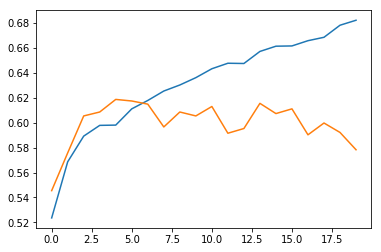

In [6]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

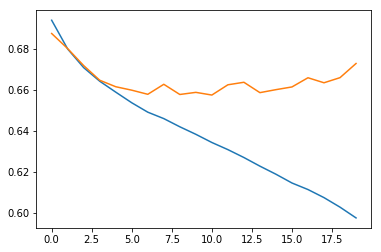

In [7]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [8]:
print('Best accurracy', max(hist.history['val_acc']))

Best accurracy 0.618686868687
